## Stock Closing Price Prediction Model
- by Zamir Khan

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [20]:
# Read stock data from Yahoo Finance
from datetime import datetime
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

In [21]:
yf.pdr_override()

In [22]:
# Stocks to analyze
stock_list=['AAPL', 'GOOG', 'MSFT', 'AMZN']
end=datetime.now()
start=datetime(end.year - 1, end.month, end.day)

In [23]:
for stock in stock_list:
    globals()[stock]=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [25]:
company_list=[AAPL, GOOG, MSFT, AMZN]
company_name=["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"]=com_name

In [26]:
df=pd.concat(company_list, axis=0)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-21,133.740005,135.190002,132.710007,134.679993,134.679993,41442500,AMAZON
2023-08-22,135.080002,135.649994,133.729996,134.250000,134.250000,32935100,AMAZON
2023-08-23,134.500000,135.949997,133.220001,135.520004,135.520004,42801000,AMAZON
2023-08-24,136.399994,136.779999,131.830002,131.839996,131.839996,43646300,AMAZON
2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44124800,AMAZON


In [27]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,159.586455,161.347291,157.952072,159.691673,159.191237,7.005872e+07
std,18.441948,18.189262,18.697303,18.412146,18.575422,2.380744e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.274216,5.165790e+07
50%,154.789993,157.089996,153.369995,155.000000,154.394058,6.549670e+07
75%,173.915001,175.505005,173.279999,174.770004,174.651970,8.135480e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [28]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-26 to 2023-08-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


### Analysis

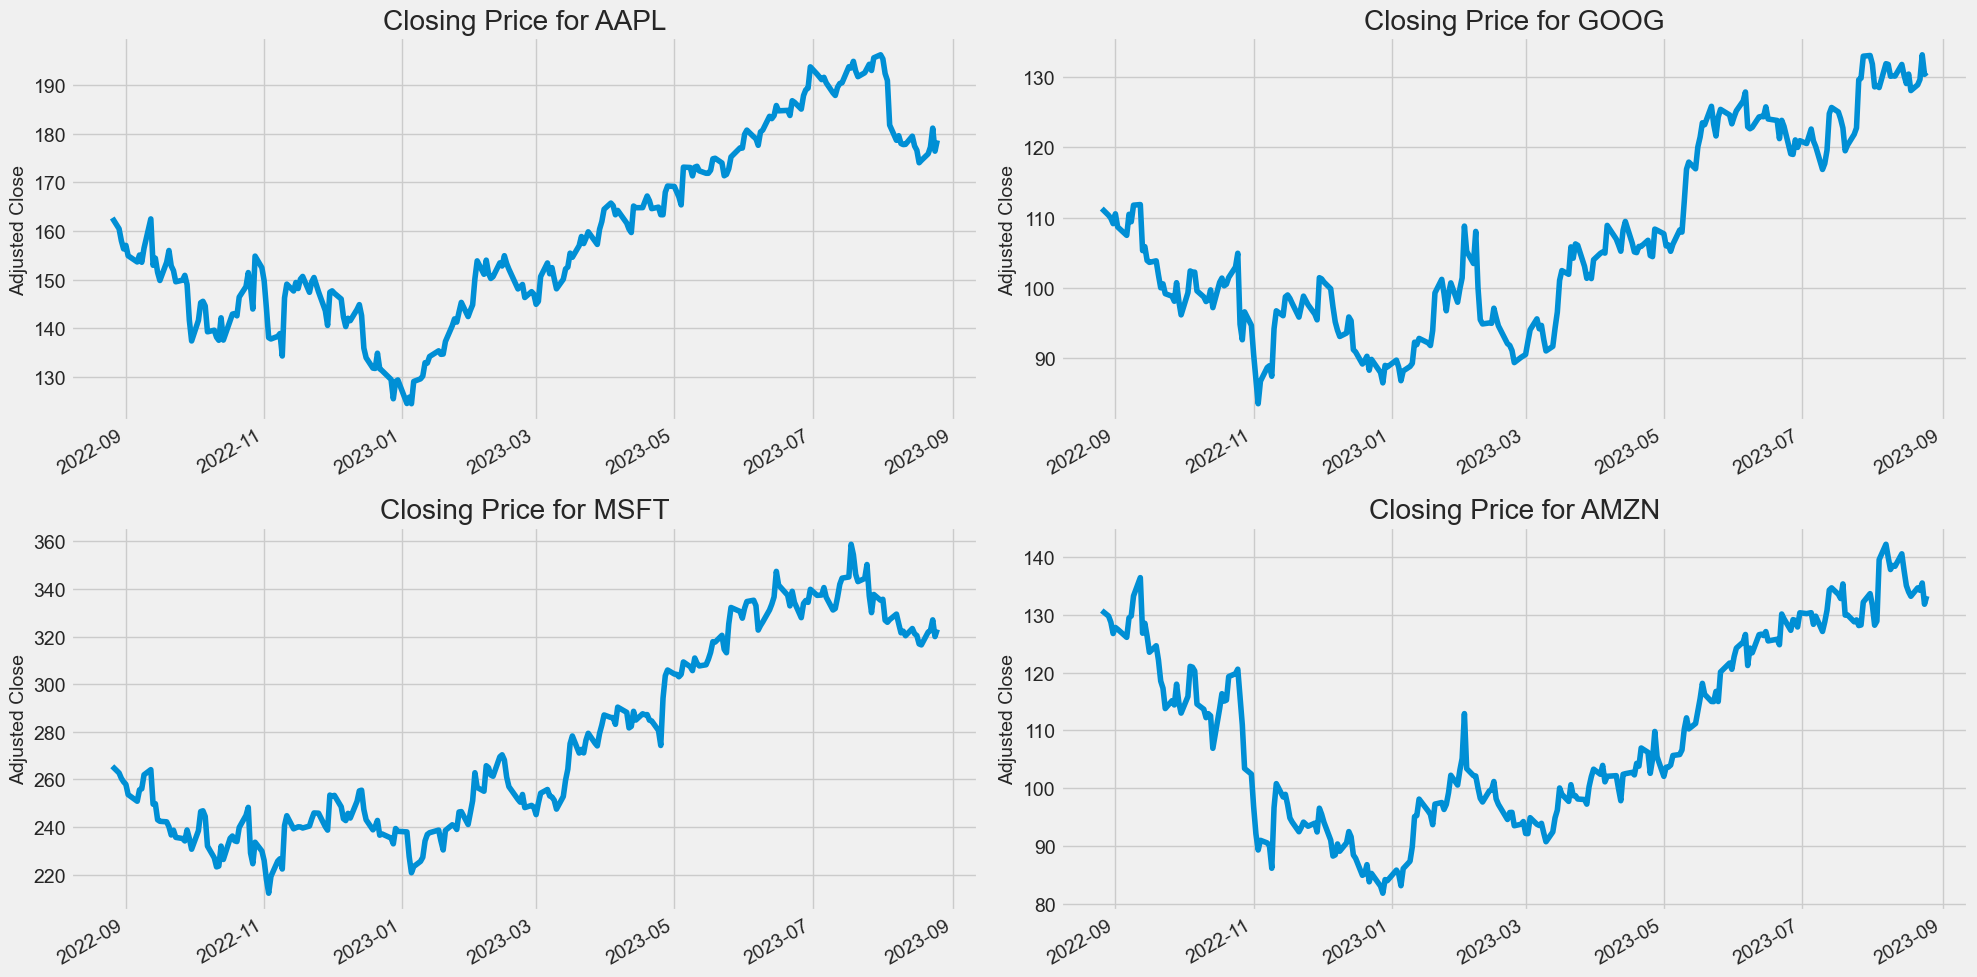

In [33]:
# Plot historical closing price

plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adjusted Close')
    plt.xlabel(None)
    plt.title(f"Closing Price for {stock_list[i - 1]}")
    
plt.tight_layout()

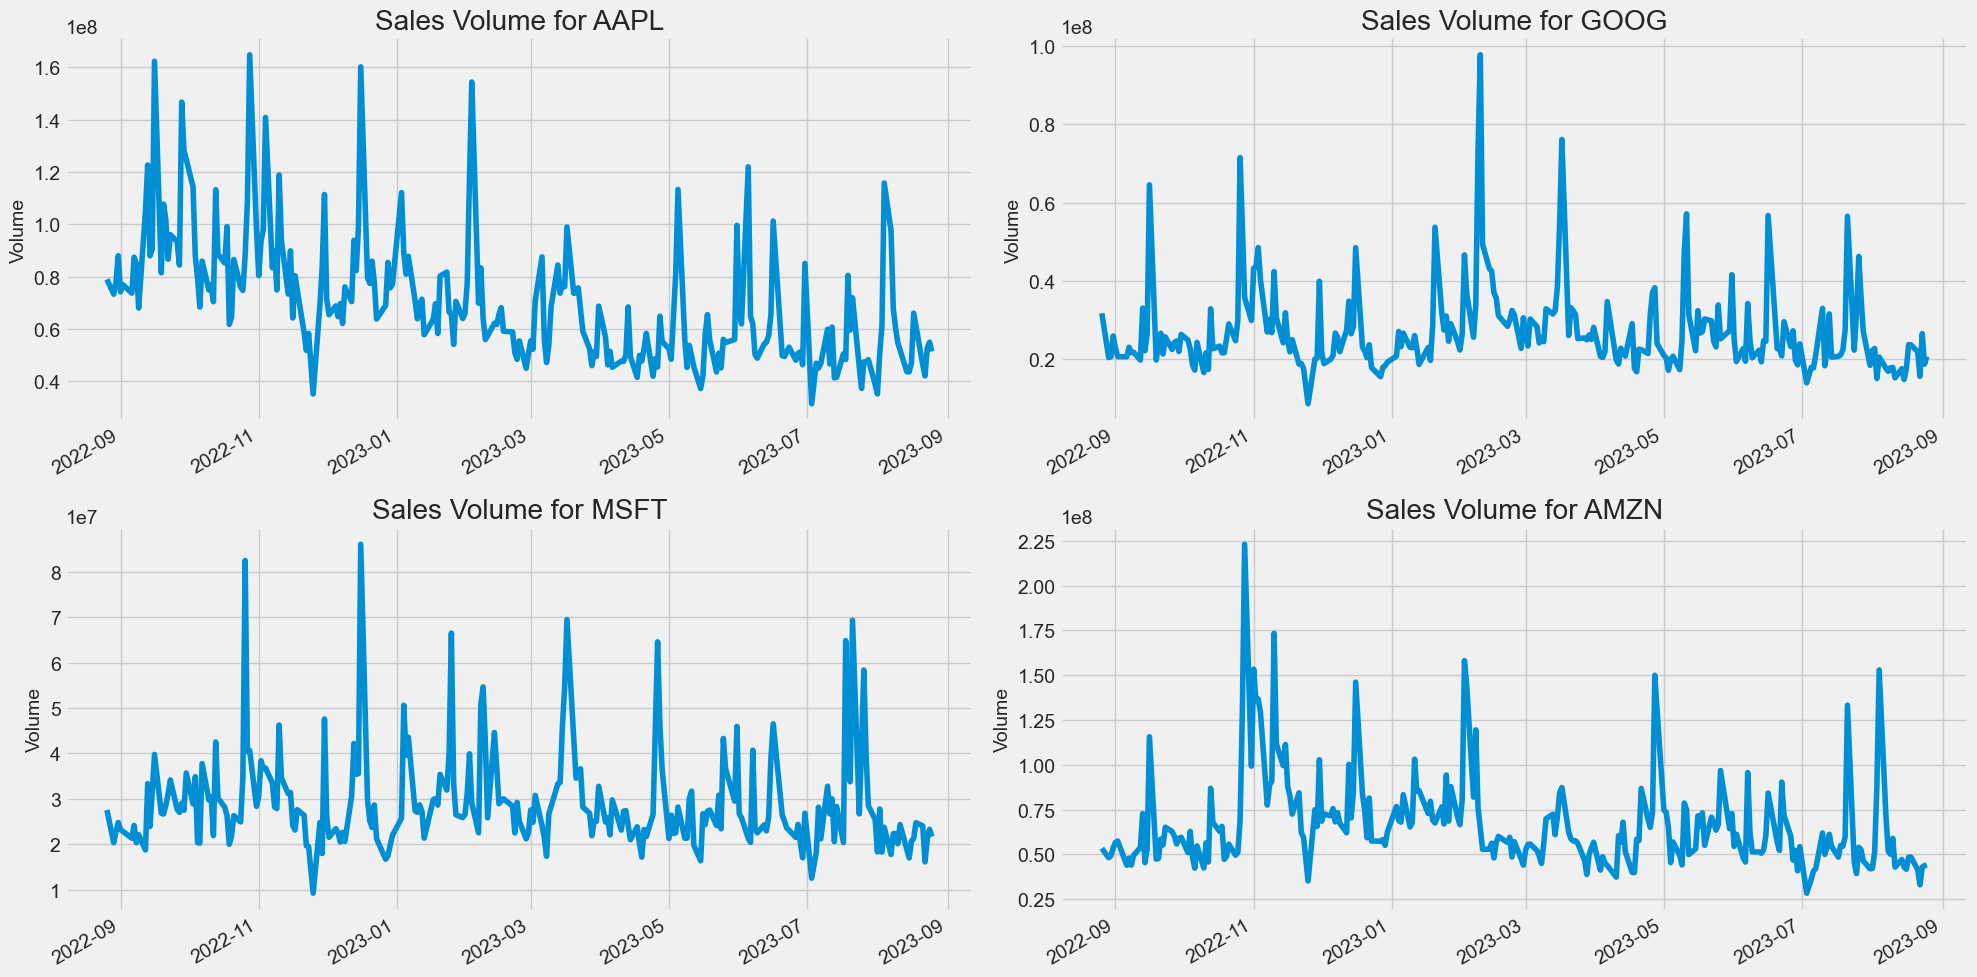

In [34]:
# Plot Total Volume of stock being traded each day

plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")
    
plt.tight_layout()

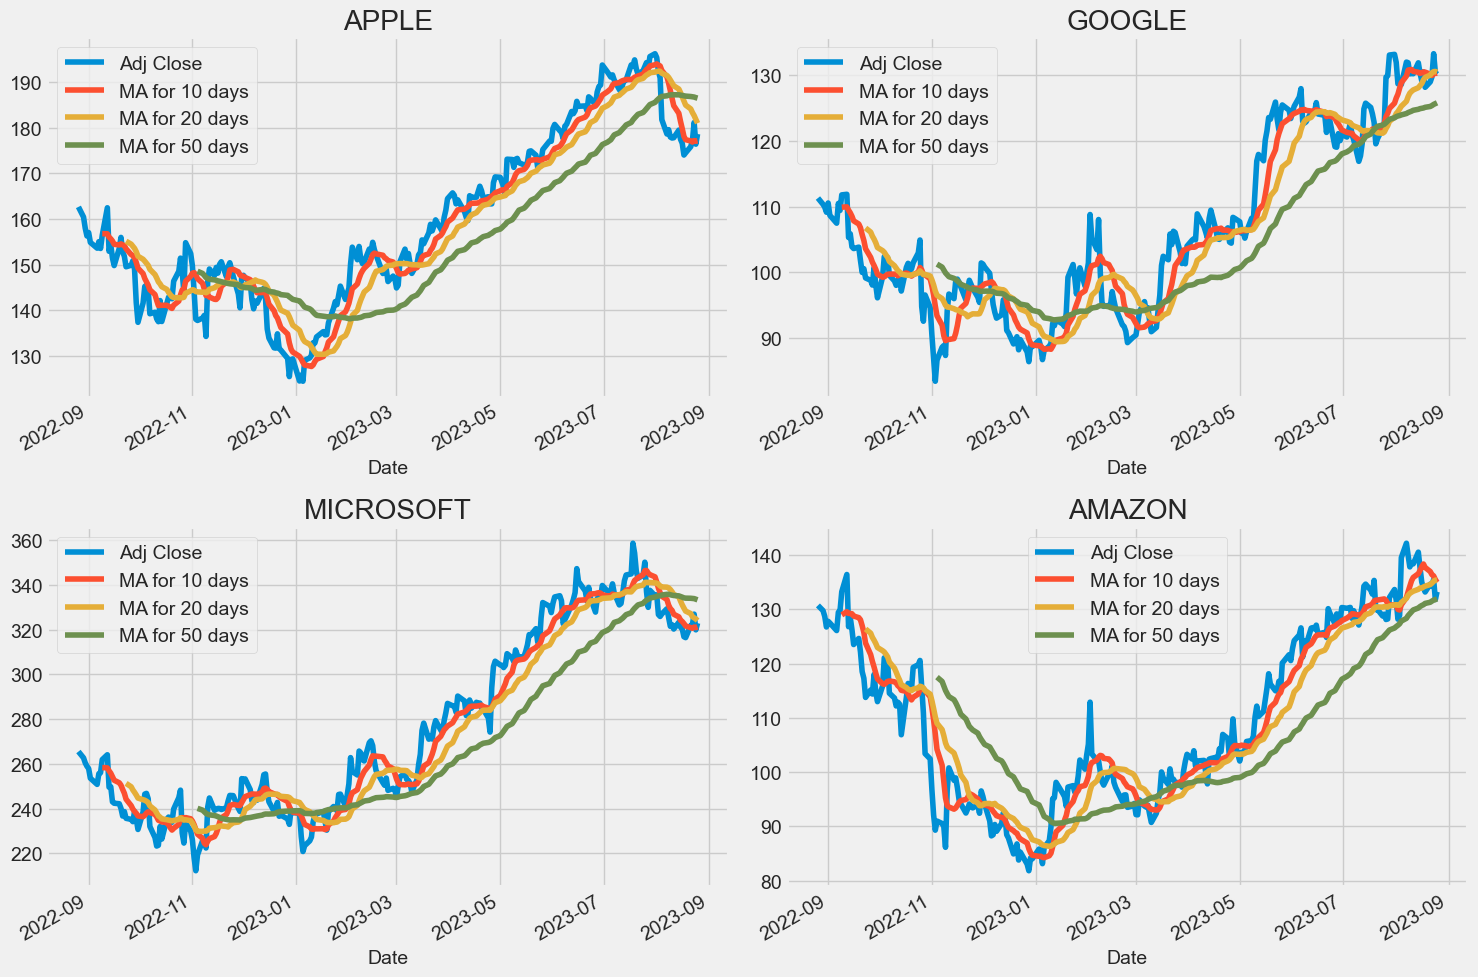

In [35]:
# Moving Average (MA) of stocks

ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

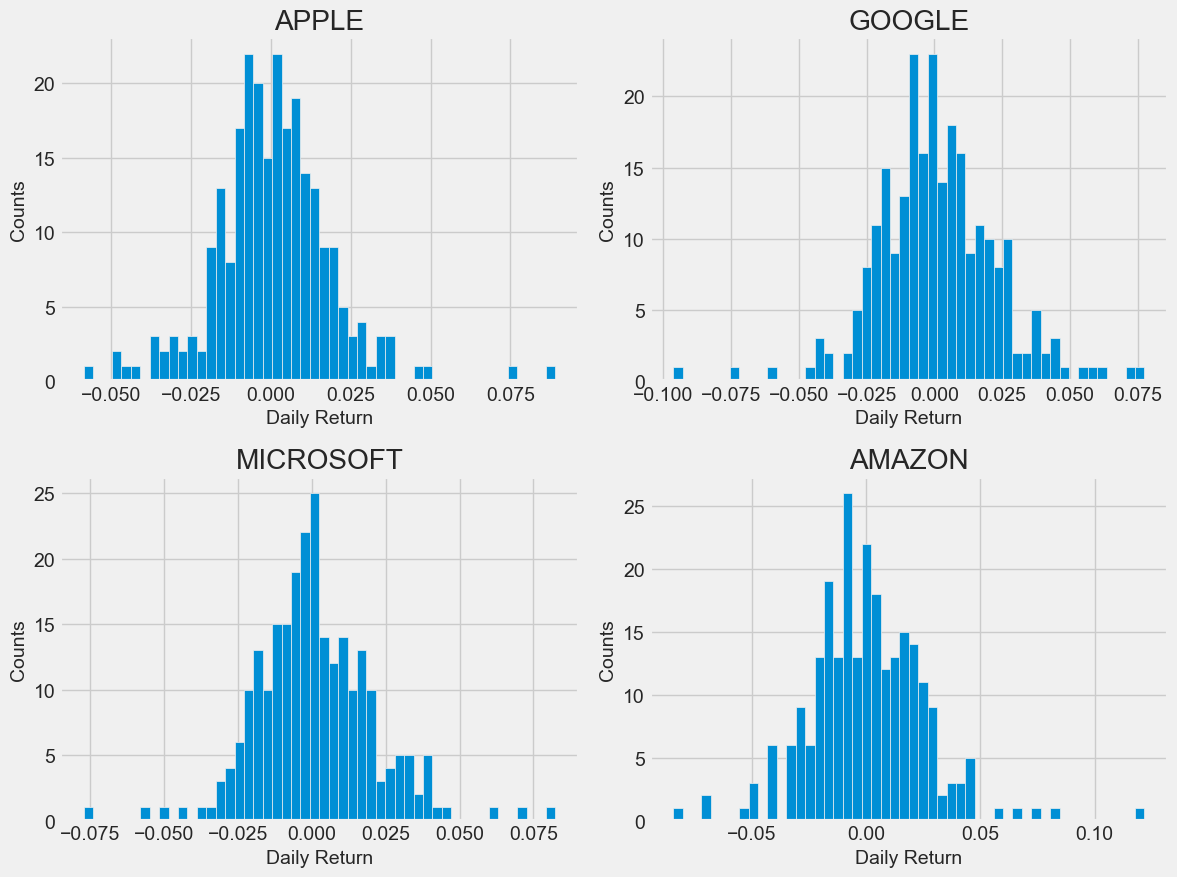

In [38]:
# Daily Return

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [40]:
# All closing prices for the stocks into one DataFrame
closing_df = pdr.get_data_yahoo(stock_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
stock_returns = closing_df.pct_change()
stock_returns.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-26,NaN,NaN,NaN,NaN
2022-08-29,-0.013690,-0.007342,-0.008625,-0.010668
2022-08-30,-0.015305,-0.008167,-0.003897,-0.008521
2022-08-31,-0.010635,-0.015226,-0.006915,-0.005704
2022-09-01,0.004707,0.008283,0.012826,-0.004092


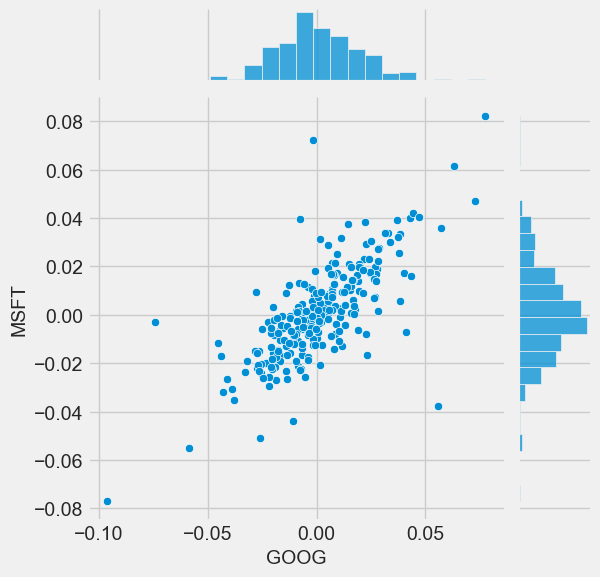

In [42]:
# Using joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=stock_returns, kind='scatter')

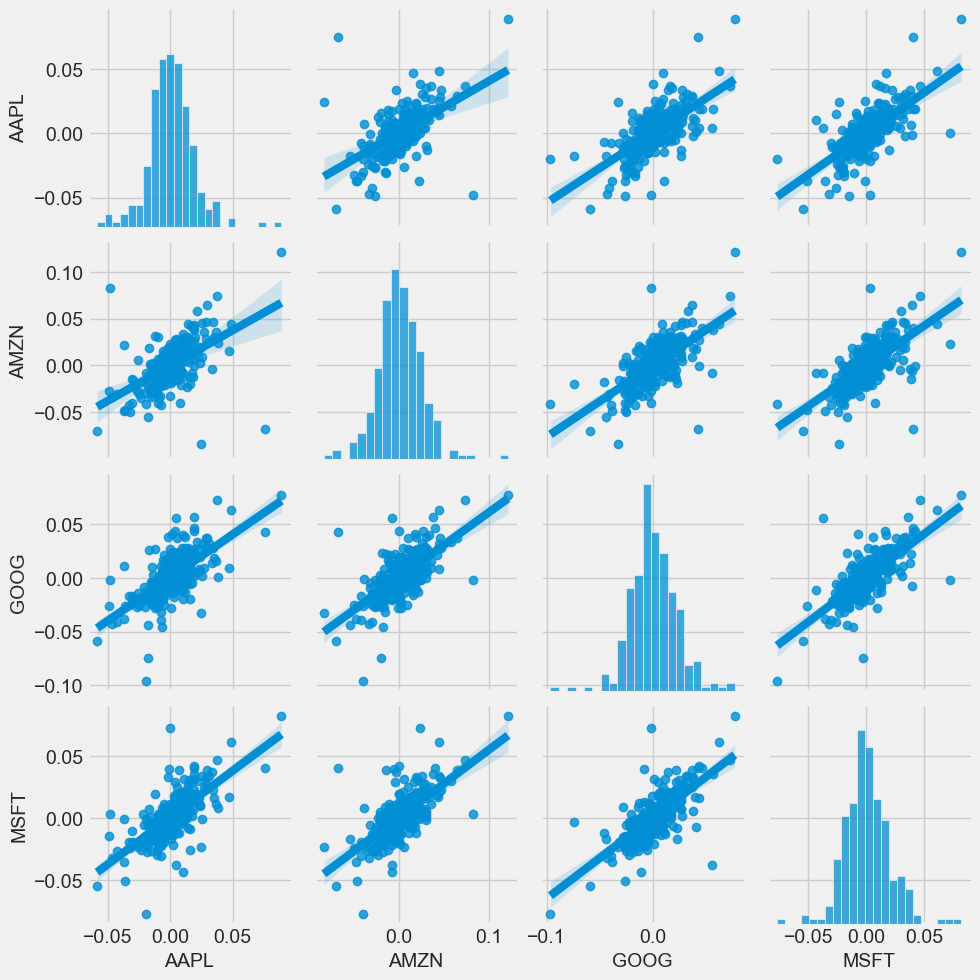

In [43]:
sns.pairplot(stock_returns, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

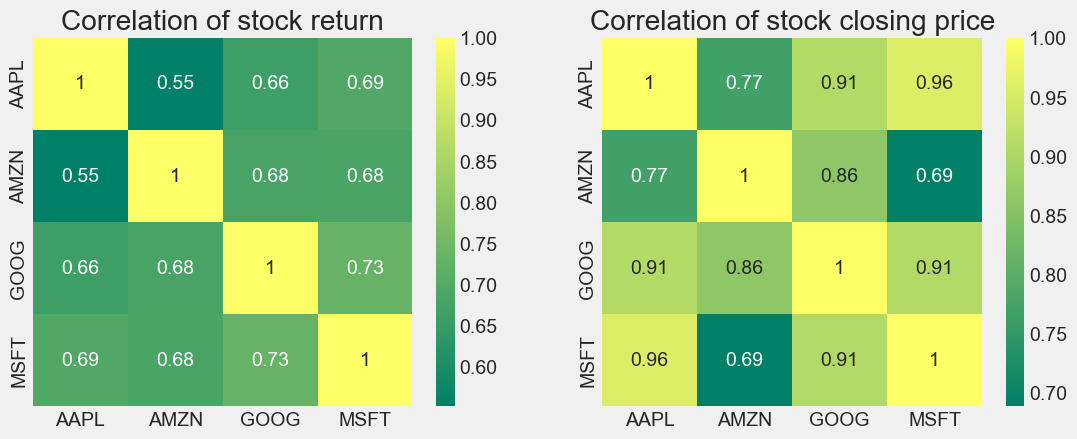

In [45]:
# Correlations Heatmap

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_returns.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

### Prediction

In [46]:
df=pdr.get_data_yahoo('AAPL', start='2015-01-01', end=datetime.now())
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498684,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808512,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810751,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144636,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072329,237458000


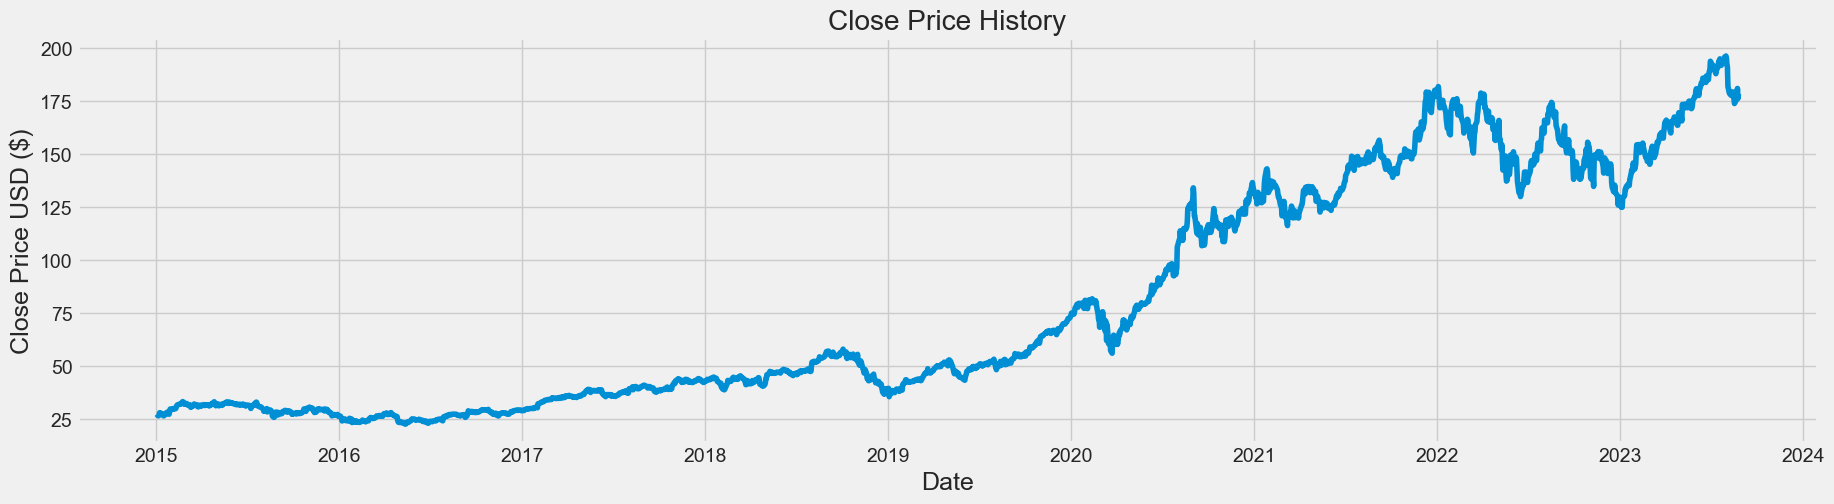

In [51]:
plt.figure(figsize=(20,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [52]:
# Create a new dataframe with only Close column
data = df.filter(['Close'])
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2069

In [53]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [54]:
scaled_data

array([[0.02730568],
       [0.02287695],
       [0.02289133],
       ...,
       [0.91182813],
       [0.88456566],
       [0.89739167]])

In [56]:
# Create Train Data
train_data= scaled_data[0:int(training_data_len), :]

X_train=[]
y_train=[]

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])        

In [57]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2009, 60, 1)

In [58]:
# Building the model
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()

In [59]:
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

2009/2009 [==============================] - 19s 9ms/step - loss: 0.0014


In [60]:
# Create Test Data
test_data = scaled_data[training_data_len - 60: , :]

X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))
X_test.shape

(108, 60, 1)

In [61]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 0s 10ms/step


In [63]:
# Root mean squared error
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

5.102232688490494

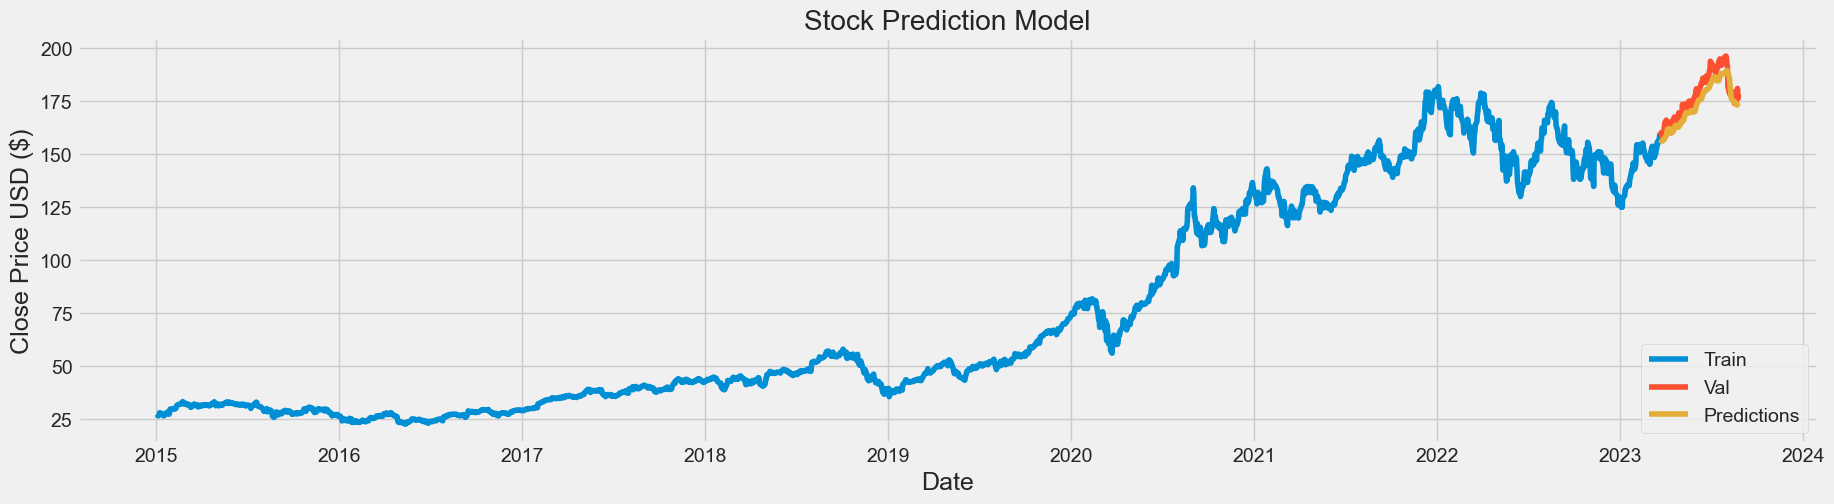

In [69]:
# Plot the data
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20,5))
plt.title('Stock Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [66]:
valid

,Close,Predictions
Date,,
2023-03-23,158.929993,155.262909
2023-03-24,160.250000,155.987045
2023-03-27,158.279999,156.716705
2023-03-28,157.649994,156.963089
2023-03-29,160.770004,156.839966
...,...,...
2023-08-21,175.839996,173.531708
2023-08-22,177.229996,173.237564
2023-08-23,181.119995,173.371872
